In [45]:
import torch
import numpy as np
from model import Generator
from tqdm import tqdm
import lpips
from space_exploring import computePPL
import matplotlib.pyplot as plt
from torchvision import utils

In [2]:
device = "cuda"
ckpt = "checkpoint/080000.pt"

g_ema = Generator(256, 512, 8)
g_ema.load_state_dict(torch.load(ckpt)['g_ema'], strict=False)
g_ema.eval()
g_ema = g_ema.to(device)

In [8]:
# Initializing the perceptual distance
percept = lpips.PerceptualLoss(
    model='net-lin', net='vgg', use_gpu=device.startswith('cuda')
) 

Setting up Perceptual loss...
Loading model from: /home/edoardo/Documenti/Thesis/test/stylegan2-pytorch/lpips/weights/v0.1/vgg.pth
...[net-lin [vgg]] initialized
...Done


In [28]:
n_sample = 1000

ppl_values = []

for sample in tqdm(range(n_sample)):
    with torch.no_grad():
        latent = torch.randn(512).to(device)
        latent = g_ema.get_latent(latent.reshape(1, -1))
        ppl_value = computePPL(latent, g_ema, percept, sample=20)
        ppl_values.append({"ppl": ppl_value, "latent": latent})


██▌   | 656/1000 [07:39<04:01,  1.43it/s]

 66%|██████▌   | 657/1000 [07:40<04:00,  1.43it/s]

 66%|██████▌   | 658/1000 [07:40<04:02,  1.41it/s]

 66%|██████▌   | 659/1000 [07:41<04:01,  1.41it/s]

 66%|██████▌   | 660/1000 [07:42<04:00,  1.42it/s]

 66%|██████▌   | 661/1000 [07:43<03:58,  1.42it/s]

 66%|██████▌   | 662/1000 [07:43<03:57,  1.42it/s]

 66%|██████▋   | 663/1000 [07:44<03:56,  1.43it/s]

 66%|██████▋   | 664/1000 [07:45<03:55,  1.43it/s]

 66%|██████▋   | 665/1000 [07:45<03:54,  1.43it/s]

 67%|██████▋   | 666/1000 [07:46<03:54,  1.43it/s]

 67%|██████▋   | 667/1000 [07:47<03:53,  1.43it/s]

 67%|██████▋   | 668/1000 [07:47<03:52,  1.43it/s]

 67%|██████▋   | 669/1000 [07:48<03:51,  1.43it/s]

 67%|██████▋   | 670/1000 [07:49<03:50,  1.43it/s]

 67%|██████▋   | 671/1000 [07:50<03:50,  1.43it/s]

 67%|██████▋   | 672/1000 [07:50<03:49,  1.43it/s]

 67%|██████▋   | 673/1000 [07:51<03:48,  1.43it/s]

 67%|██████▋   | 674/1000 [07:52<03:48,  1.43it/s]

 68%|██████▊   | 675/

(array([  6.,  20.,  27.,  40.,  81.,  90., 120., 110., 139.,  91.,  63.,
         48.,  40.,  31.,  16.,  12.,  11.,   9.,  10.,   6.,   4.,   4.,
          3.,   3.,   2.,   1.,   2.,   0.,   2.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   2.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([ 2001792. ,  2613764.2,  3225736.8,  3837709. ,  4449681.5,
         5061654. ,  5673626. ,  6285598.5,  6897571. ,  7509543. ,
         8121515.5,  8733488. ,  9345460. ,  9957433. , 10569405. ,
        11181377. , 11793350. , 12405322. , 13017294. , 13629267. ,
        14241239. , 14853212. , 15465184. , 16077156. , 16689129. ,
        17301100. , 17913074. , 18525046. , 19137018. , 19748990. ,
        20360962. , 20972936. , 21584908. , 22196880. , 22808852. ,
        23420824. , 24032796. , 24644770. , 25256742. , 25868714. ,
        26480686. , 27092658. , 27704632. , 28316604. , 28928576. ,
        29540548. , 30152520. , 30764492. , 31

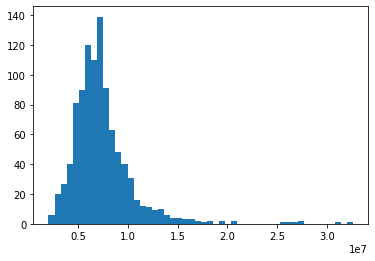

In [33]:
sorted_ppl = sorted(ppl_values, key=lambda dic: dic["ppl"])
ppl_list = np.array(list(map(lambda dic: dic["ppl"], sorted_ppl)))


plt.hist(ppl_list, bins=50)


In [52]:
for i in range(1, 21):
    img, _ = g_ema([sorted_ppl[i]["latent"]], input_is_latent=True)
    utils.save_image(
        img,
        f'generated_images/low_ppl_{i}.png',
        nrow=1,
        normalize=True,
        range=(-1, 1),
    )
    img, _ = g_ema([sorted_ppl[-i]["latent"]], input_is_latent=True)
    utils.save_image(
        img,
        f'generated_images/high_ppl_{i}.png',
        nrow=1,
        normalize=True,
        range=(-1, 1),
    )